### Not Environment used: TensorFlow 2.6 Python 3.8 GPU Optimised

# CNN Implementation with Fashion MNIST
### Brief Introduction

## Basic concepts of CNN model :

The first step in image processing is to understand,

how to represent an image so that the machine can read it

Every image is an cumulative arrangement of dots (a pixel) arranged in a special order. If you change the order or color of a pixel, the image would change as well.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)
Three basic components to define a basic convolutional neural network.

### The Convolutional Layer
### The Pooling layer
### The Output layer

Let’s see each of them in detail

### The Convolutional Layer :

In this layer if we have an image of size 6*6. We define a weight matrix which extracts certain features from the images*

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28010254/conv1.png)

We have initialized the weight as a 3*3 matrix. This weight shall now run across the image such that all the pixels are covered at least once, to give a convolved output. The value 429 above, is obtained by the adding the values obtained by element wise multiplication of the weight matrix and the highlighted 3*3 part of the input image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28011851/conv.gif)

The 6*6 image is now converted into a 4*4 image.  Think of weight matrix like a paint brush painting a wall. The brush first paints the wall horizontally and then comes down and paints the next row horizontally. Pixel values are used again when the weight matrix moves along the image. This basically enables parameter sharing in a convolutional neural network.

Let’s see how this looks like in a real image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28132834/convimages.png)

* The weight matrix behaves like a filter in an image, extracting particular information from the original image matrix.
* A weight combination might be extracting edges, while another one might a particular color, while another one might just blur the unwanted noise.
* The weights are learnt such that the loss function is minimized and extract features from the original image which help the network in correct prediction.
* When we use multiple convolutional layers, the initial layer extract more generic features,and as network gets deeper the features get complex.

Let us understand some concepts here before we go further deep

#### What is Stride?

As shown above above, the filter or the weight matrix we moved across the entire image moving one pixel at a time.If this is a hyperparameter to move weight matrix 1 pixel at a time across image it is called as stride of 1. Let us see for stride of 2 how it looks.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28090227/stride1.gif)

As you can see the size of image keeps on reducing as we increase the stride value.

Padding the input image with zeros across it solves this problem for us. We can also add more than one layer of zeros around the image in case of higher stride values.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28093553/zero-padding.png)

We can see how the initial shape of the image is retained after we padded the image with a zero. This is known as same padding since the output image has the same size as the input.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28094927/padding.gif)

This is known as same padding (which means that we considered only the valid pixels of the input image). The middle 4*4 pixels would be the same. Here we have retained more information from the borders and have also preserved the size of the image.

#### Having Multiple filters & the Activation Map

* The depth dimension of the weight would be same as the depth dimension of the input image.
* The weight extends to the entire depth of the input image.
* Convolution with a single weight matrix would result into a convolved output with a single depth dimension. In case of multiple filters all have same dimensions applied together.
* The output from the each filter is stacked together forming the depth dimension of the convolved image.

Suppose we have an input image of size 32*32*3. And we apply 10 filters of size 5*5*3 with valid padding. The output would have the dimensions as 28*28*10.

You can visualize it as –

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28113904/activation-map.png)

This activation map is the output of the convolution layer.

### The Pooling Layer

If images are big in size, we would need to reduce the no.of trainable parameters.For this we need to use pooling layers between convolution layers. Pooling is used for reducing the spatial size of the image and is implemented independently on each depth dimension resulting in no change in image depth. Max pooling is the most popular form of pooling layer.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28022816/maxpool.png)

Here we have taken stride as 2, while pooling size also as 2. The max operation is applied to each depth dimension of the convolved output. As you can see, the 4*4 convolved output has become 2*2 after the max pooling operation.

Let’s see how max pooling looks on a real image.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28133544/pooling.png)

In the above image we have taken a convoluted image and applied max pooling on it which resulted in still retaining the image information that is a car but if we closely observe the dimensions of the image is reduced to half which basically means we can reduce the parameters to a great number.

There are other forms of pooling like average pooling, L2 norm pooling.

#### Output dimensions

It is tricky at times to understand the input and output dimensions at the end of each convolution layer. For this we will use three hyperparameters that would control the size of output volume.

1. No of Filter: The depth of the output volume will be equal to the number of filter applied.The depth of the activation map will be equal to the number of filters.

2. Stride – When we have a stride of one we move across and down a single pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

3. Zero padding – This helps us to preserve the size of the input image. If a single zero padding is added, a single stride filter movement would retain the size of the original image.

We can apply a simple formula to calculate the output dimensions.

The spatial size of the output image can be calculated as( [W-F+2P]/S)+1.
where, W is the input volume size,
       F is the size of the filter,
       P is the number of padding applied
       S is the number of strides.
       
Let us take an example of an input image of size 64*64*3, we apply 10 filters of size 3*3*3, with single stride and no zero padding.

Here W=64, F=3, P=0 and S=1. The output depth will be equal to the number of filters applied i.e. 10.

The size of the output volume will be ([64-3+0]/1)+1 = 62. Therefore the output volume will be 62*62*10.

### The Output layer
* With no of layers of convolution and padding, we need the output in the form of a class.
* To generate the final output we need to apply a fully connected layer to generate an output equal to the number of classes we need.
* Convolution layers generate 3D activation maps while we just need the output as whether or not an image belongs to a particular class.
* The Output layer has a loss function like categorical cross-entropy, to compute the error in prediction. Once the forward pass is complete the backpropagation begins to update the weight and biases for error and loss reduction.

### Summary:
* Pass an input image to the first convolutional layer. The convoluted output is obtained as an activation map. The filters applied in the convolution layer extract relevant features from the input image to pass further.
* Each filter shall give a different feature to aid the correct class prediction. In case we need to retain the size of the image, we use same padding(zero padding), otherwise valid padding is used since it helps to reduce the number of features.
* Pooling layers are then added to further reduce the number of parameters
* Several convolution and pooling layers are added before the prediction is made. Convolutional layer help in extracting features. As we go deeper in the network more specific features are extracted as compared to a shallow network where the features extracted are more generic.
* The output layer in a CNN as mentioned previously is a fully connected layer, where the input from the other layers is flattened and sent so as the transform the output into the number of classes as desired by the network.
* The output is then generated through the output layer and is compared to the output layer for error generation. A loss function is defined in the fully connected output layer to compute the mean square loss. The gradient of error is then calculated.
* The error is then backpropagated to update the filter(weights) and bias values.
* One training cycle is completed in a single forward and backward pass.

### Implement CNN model in realtime using Fashion MNIST dataset

![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)

### Data Description

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the article of clothing.
* The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.



#### Labels
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


## Step1: Import partial from functools module
The functools module in Python provides various useful functions for working with functions and callable objects.

In [1]:
from functools import partial

##Step 2: Import the necessary modules from TensorFlow.Keras
1. Import the TensorFlow implementation of Keras
2. Function **to_categorical** is used to convert class labels into the desired format before training or evaluating a deep learning model.

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

## Step 3: Create a custom Conv2D layer with default parameter

In [3]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding = "SAME")

## Step 4: From subprocess import check_output
1. Import the pandas library for data manipulation and analysis
2. Import the numpy library for numerical operations
3. Import the warnings module to manage warning messages
4. Ignore warning messages
5. Import the matplotlib.pyplot module for plotting
6. Import train_test_split for splitting the data
7. Import the Keras library for deep learning
8. Import different layers for building the model
9. Import the Adam optimizer
10. Import the TensorBoard callback for visualization


In [4]:

# print(check_output(["ls", "../input"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
num_classes = 10
# epochs = 20

## Step 5: Create dataframes for train and test datasets

- Import the TensorFlow library

In [5]:
import tensorflow

- Load the Fashion MNIST dataset
- Load the training and testing data from the Fashion MNIST dataset


In [6]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step 


- Print the shapes of the training and testing data

In [7]:
print((X_train_full.shape, y_train_full.shape), (X_test.shape, y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[55000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[55000:]

## Step 6: Now let us visualize the some samples after the resize of the data which needs to be ready for train the network.
-Create a new figure with a size of 10x10 inches
- Create a subplot within the figure
- Remove x-axis and y-axis ticks
- Turn off the grid lines
- Display the image at index i
- Get the label index for the image
- Set the title as the corresponding class name
- Display the figure



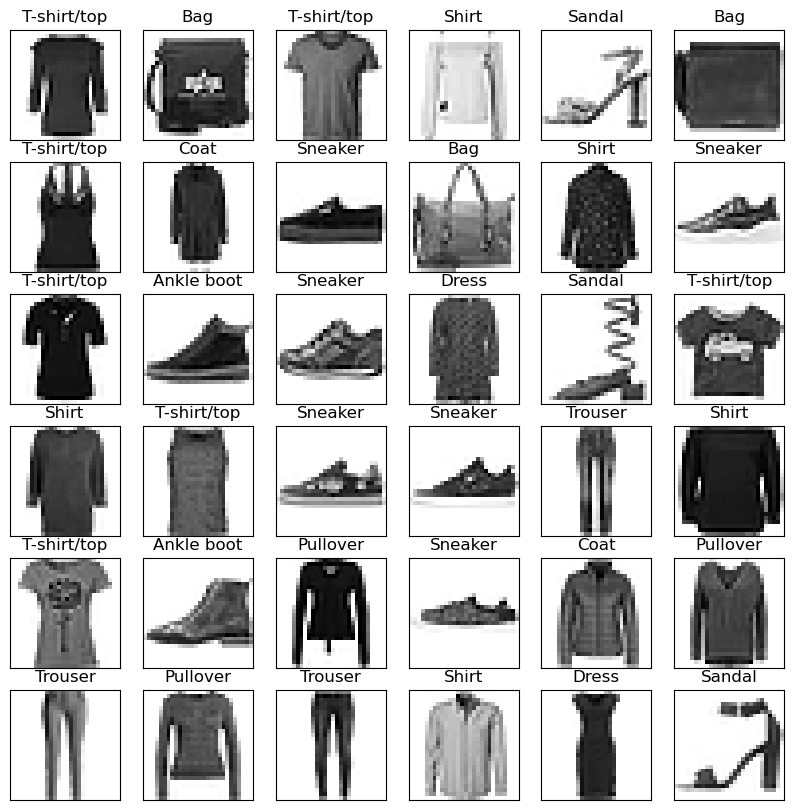

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

Labels
Each training and test example is assigned to one of the following labels as shown below:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

## Step 7: Create the Convolutional Neural Networks (CNN)
- First of all define the shape of the image before defining the model.
- Define the shape of the image as 3d with rows and columns and 1 for the 3d visualization


In [10]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

- Now we need to do more formating on the x_train,x_test and x_validate sets.

In [11]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)
X_valid = X_valid.reshape(X_valid.shape[0],*image_shape)

##Step 8: Define the model

The first layer in model network, keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer unstacks rows of pixels in the image and lining them up and has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 32 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [12]:
from tensorflow import keras

In [12]:
model = keras.models.Sequential([
DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=256),
DefaultConv2D(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=64, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=10, activation='softmax'),
])

## Step 9: Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to steer the model in the right direction.Here we will use **sparse_categorical_crossentropy**
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

## Step 9: Train Model
Training the neural network model requires the following steps:

* Feed the training data to the model. In this example, the training data is in the x_train and y_train arrays.
* The model learns to associate images and labels.
* You ask the model to make predictions about a test set—in this example, the x_test array. Verify that the predictions match the labels from the y_test array.
- To start training, call the **model.fit **method — so called because it fits the model to the training data

In [17]:
history = model.fit(
    X_train,
    y_train,
    batch_size=2000,
    epochs=40,
    verbose=1,
    validation_data=(X_valid,y_valid),
)

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.1146 - loss: 2.2910 - val_accuracy: 0.2742 - val_loss: 2.2195
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.1954 - loss: 2.1853 - val_accuracy: 0.3864 - val_loss: 1.9024
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.2642 - loss: 1.9637 - val_accuracy: 0.5312 - val_loss: 1.5392
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.3446 - loss: 1.7761 - val_accuracy: 0.5280 - val_loss: 1.3435
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.3880 - loss: 1.6796 - val_accuracy: 0.6468 - val_loss: 1.2194
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.4610 - loss: 1.5169 - val_accuracy: 0.6764 - val_loss: 1.0736
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4838 - loss: 1.4518 - val_accuracy: 0.7088 - val_loss: 1.0400
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.5170 - loss: 1.3773 - val_accuracy: 0.6776 - val_loss: 0.9520
Epoch 9/

## Step 10: Plot the Training Accuracy vs. Loss to get a better understanding of the model training.

- Create a new figure with a size of 10x10 inches
- Create a subplot at position 1 in a 2x2 grid
- Plot the training loss
- Plot the validation loss
- Display legend
- Set the title of the subplot
- Create a subplot at position 2 in a 2x2 grid
- Plot the training accuracy
- Plot the validation accuracy
- Display legend
- Set the title of the subplot



In [18]:
history.history.items()

dict_items([('accuracy', [0.11460000276565552, 0.19539999961853027, 0.26420000195503235, 0.34459999203681946, 0.3880000114440918, 0.460999995470047, 0.4837999939918518, 0.5170000195503235, 0.5573999881744385, 0.5788000226020813, 0.597599983215332, 0.6251999735832214, 0.644599974155426, 0.6467999815940857, 0.6664000153541565, 0.6758000254631042, 0.6881999969482422, 0.6937999725341797, 0.7125999927520752, 0.7128000259399414, 0.7200000286102295, 0.7269999980926514, 0.7325999736785889, 0.7401999831199646, 0.7386000156402588, 0.7505999803543091, 0.7572000026702881, 0.7531999945640564, 0.7698000073432922, 0.7710000276565552, 0.7735999822616577, 0.7821999788284302, 0.7735999822616577, 0.7748000025749207, 0.782800018787384, 0.7942000031471252, 0.7936000227928162, 0.7990000247955322, 0.7991999983787537, 0.8023999929428101]), ('loss', [2.2909533977508545, 2.1852691173553467, 1.9636839628219604, 1.7761166095733643, 1.6795552968978882, 1.5168882608413696, 1.4518182277679443, 1.377318024635315, 1.2

In [19]:
history.history['val_accuracy']

[0.2741999924182892,
 0.3864000141620636,
 0.5311999917030334,
 0.527999997138977,
 0.6467999815940857,
 0.6764000058174133,
 0.7088000178337097,
 0.6776000261306763,
 0.7242000102996826,
 0.7498000264167786,
 0.7251999974250793,
 0.743399977684021,
 0.751800000667572,
 0.7613999843597412,
 0.7605999708175659,
 0.7680000066757202,
 0.7710000276565552,
 0.7734000086784363,
 0.7871999740600586,
 0.7882000207901001,
 0.7978000044822693,
 0.7986000180244446,
 0.8040000200271606,
 0.7947999835014343,
 0.807200014591217,
 0.8158000111579895,
 0.8216000199317932,
 0.8130000233650208,
 0.8259999752044678,
 0.8274000287055969,
 0.8313999772071838,
 0.8281999826431274,
 0.8299999833106995,
 0.8420000076293945,
 0.8416000008583069,
 0.8398000001907349,
 0.8360000252723694,
 0.8464000225067139,
 0.8434000015258789,
 0.8496000170707703]

In [20]:
history.history['accuracy']

[0.11460000276565552,
 0.19539999961853027,
 0.26420000195503235,
 0.34459999203681946,
 0.3880000114440918,
 0.460999995470047,
 0.4837999939918518,
 0.5170000195503235,
 0.5573999881744385,
 0.5788000226020813,
 0.597599983215332,
 0.6251999735832214,
 0.644599974155426,
 0.6467999815940857,
 0.6664000153541565,
 0.6758000254631042,
 0.6881999969482422,
 0.6937999725341797,
 0.7125999927520752,
 0.7128000259399414,
 0.7200000286102295,
 0.7269999980926514,
 0.7325999736785889,
 0.7401999831199646,
 0.7386000156402588,
 0.7505999803543091,
 0.7572000026702881,
 0.7531999945640564,
 0.7698000073432922,
 0.7710000276565552,
 0.7735999822616577,
 0.7821999788284302,
 0.7735999822616577,
 0.7748000025749207,
 0.782800018787384,
 0.7942000031471252,
 0.7936000227928162,
 0.7990000247955322,
 0.7991999983787537,
 0.8023999929428101]

Text(0.5, 1.0, 'Train - Accuracy')

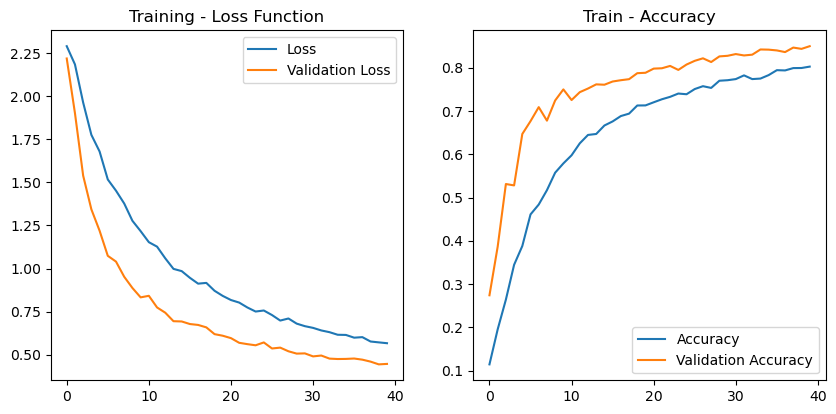

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Step 11: Evaluate or score the model
- Evaluate the model on the test data
- Print the test loss and test accuracy


In [22]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 57.3428
Test Accuracy : 0.8324


## Step 12: Results: Plot training and validation accuracy as well as loss.
- Import the necessary module for plotting
- Enable inline plotting in Jupyter Notebook
- Extract the accuracy and loss values from the history object
- Generate the x-axis values (epochs)
- Plot the training accuracy
- Plot the validation accuracy
- Set the title of the plot
- Display the legend
- Create a new figure for the next plot
- Plot the training loss and the validation loss
- Display the legend and show the plot




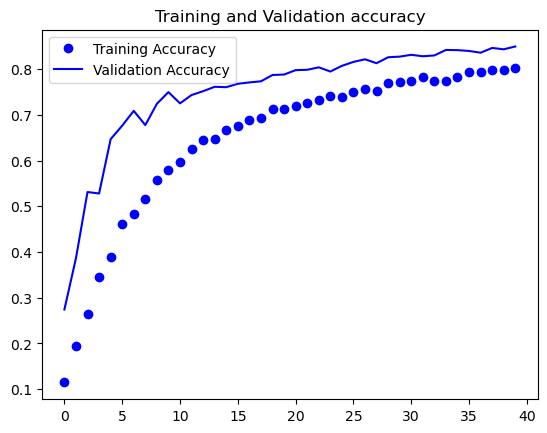

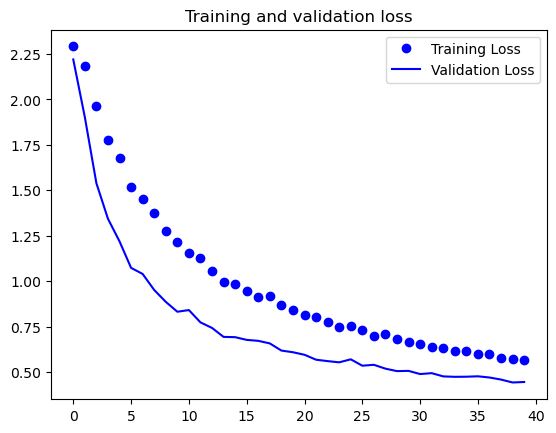

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Step 13: Create a DataFrame
- Import the pandas library and alias it as 'pd'
- Create a DataFrame from the history object and plot it
- Display gridlines on the plot
-  Set the vertical range of the plot to [0-1]
- Show the plot


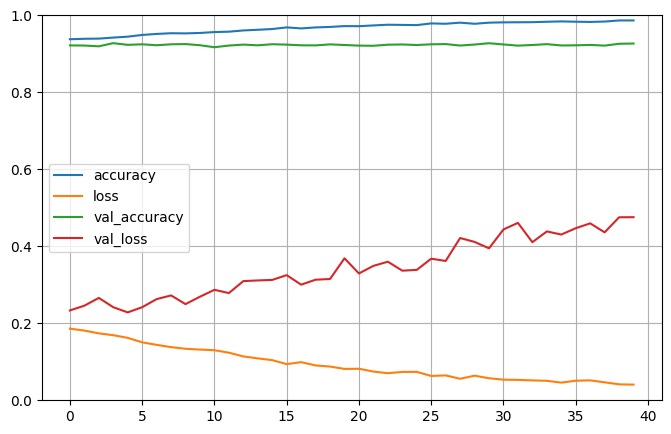

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Step 14: Classification Report
- Summarize the performance of our classifier as follows:
- Get the predictions for the test data
- Get the indices to be plotted

In [28]:
#predicted_classes = model.predict_classes(X_test.astype('float'))
predicted_classes= model.predict(X_test.astype('float'))
classes_x=np.argmax(predicted_classes,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
predicted_classes

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [30]:
predicted_classes_0_9 = predicted_classes.argmax(axis=1)

In [31]:
y_true = y_test
correct = np.nonzero(predicted_classes_0_9==y_true)[0]
incorrect = np.nonzero(predicted_classes_0_9!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes_0_9, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.81      0.84      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.75      0.93      0.83      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.78      0.62      0.69      1000
     Class 7       0.97      0.95      0.96      1000
     Class 8       0.96      0.99      0.98      1000
     Class 9       0.95      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Let us examine the test label and check if it the right classification or not.

## Step 15:
- Number of rows in the subplot grid is 5
- Number of columns in the subplot grid is 5
- Create a figure with subplots
- Flatten the axes array
- Display the image in the i-th subplot
- Set the title of the subplot
- Turn off the axis ticks and labels for cleaner visualization
- Adjust the spacing between subplots horizontally


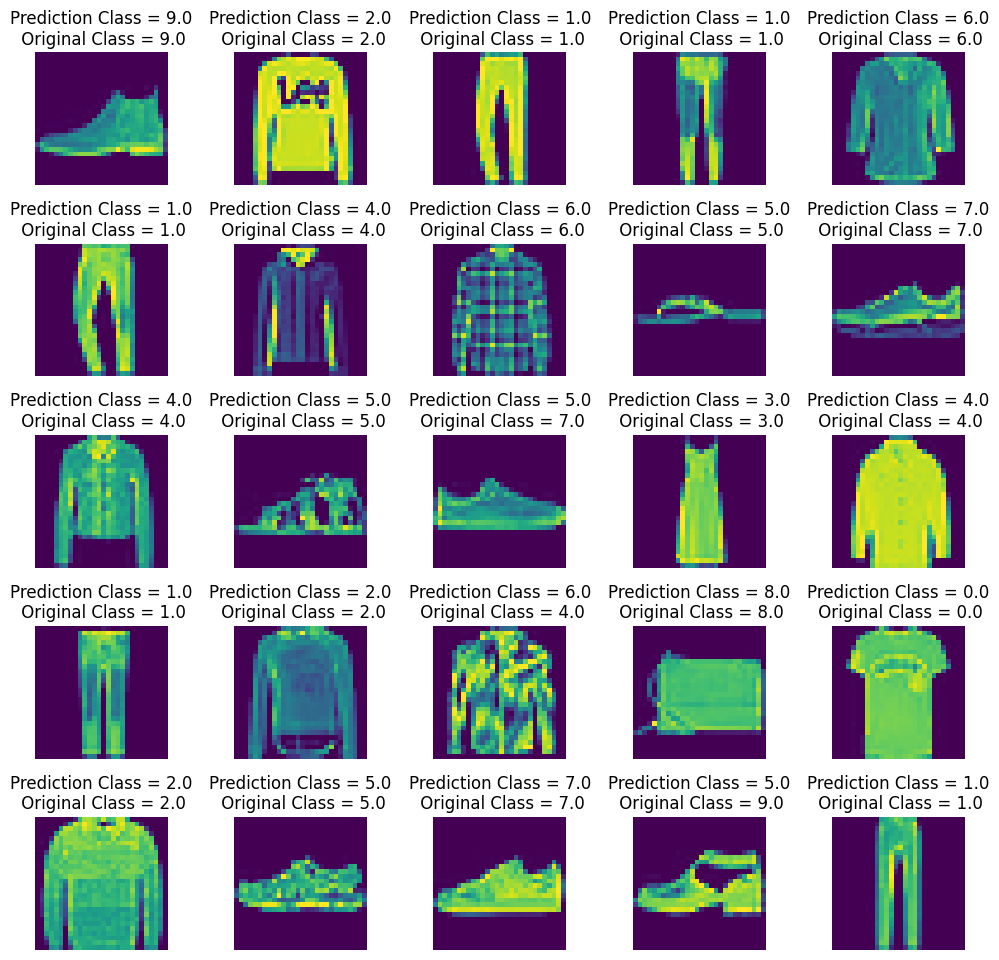

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes_0_9[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)